<a href="https://colab.research.google.com/github/vishwaas-hkumarCS338/ML-LAB/blob/main/1BM22CS338_LAB6_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy of SVM with Linear Kernel: 1.00
Accuracy of SVM with RBF Kernel: 1.00


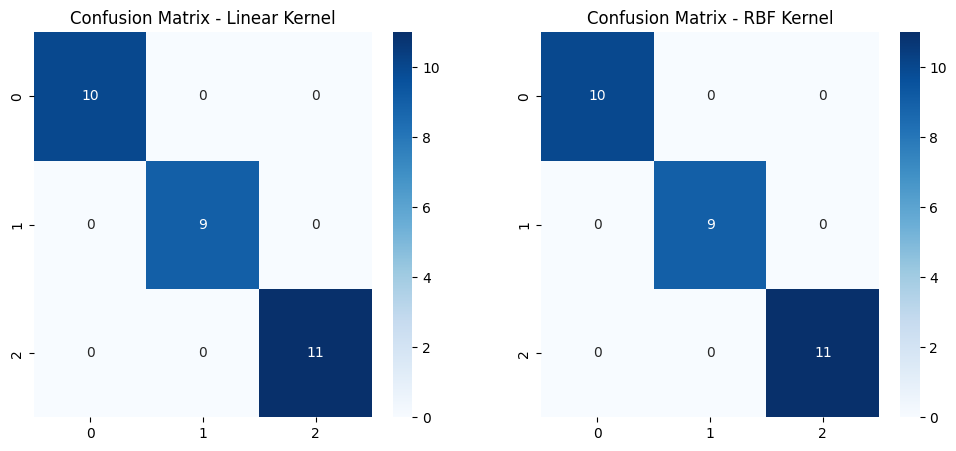

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# URL of the Iris dataset (adjust this URL if needed)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Column names as the dataset contains headers now
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Load the dataset from the URL into a pandas DataFrame
iris = pd.read_csv(url, header=None, names=columns)

# Map the species names to numeric values (for classification)
iris['species'] = iris['species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

# Split features and target
X = iris.drop('species', axis=1)
y = iris['species']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train SVM with a linear kernel
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)

# Predict and calculate accuracy for the linear kernel model
y_pred_linear = svm_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
conf_matrix_linear = confusion_matrix(y_test, y_pred_linear)

# Initialize and train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)

# Predict and calculate accuracy for the RBF kernel model
y_pred_rbf = svm_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
conf_matrix_rbf = confusion_matrix(y_test, y_pred_rbf)

# Display accuracy scores
print(f"Accuracy of SVM with Linear Kernel: {accuracy_linear:.2f}")
print(f"Accuracy of SVM with RBF Kernel: {accuracy_rbf:.2f}")

# Plot confusion matrices for both models
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Linear Kernel Confusion Matrix
sns.heatmap(conf_matrix_linear, annot=True, fmt="d", cmap="Blues", xticklabels=iris['species'].unique(),
            yticklabels=iris['species'].unique(), ax=axes[0])
axes[0].set_title('Confusion Matrix - Linear Kernel')

# RBF Kernel Confusion Matrix
sns.heatmap(conf_matrix_rbf, annot=True, fmt="d", cmap="Blues", xticklabels=iris['species'].unique(),
            yticklabels=iris['species'].unique(), ax=axes[1])
axes[1].set_title('Confusion Matrix - RBF Kernel')

plt.show()


Accuracy Score with Linear Kernel: 0.8545


<Figure size 1000x800 with 0 Axes>

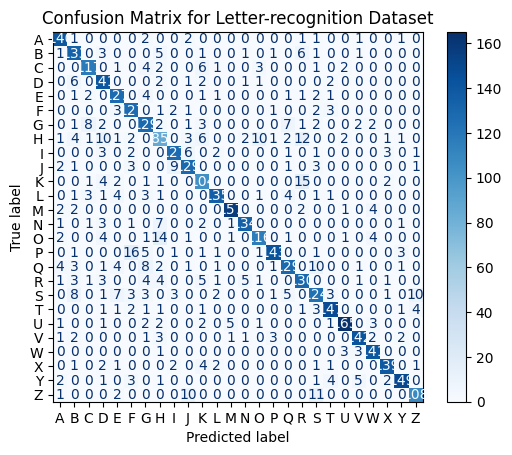

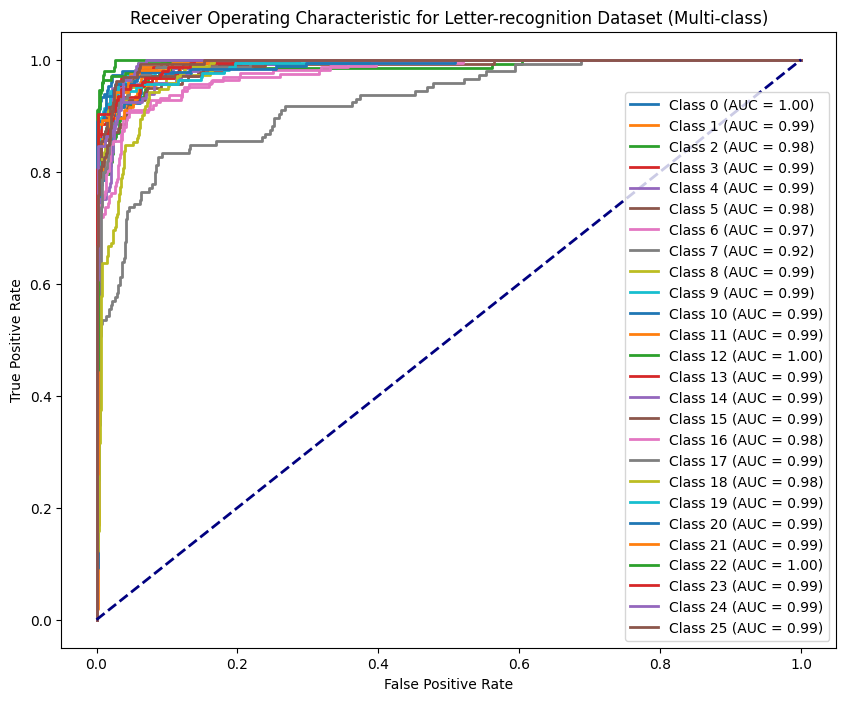

AUC score for Class 0: 0.9955
AUC score for Class 1: 0.9896
AUC score for Class 2: 0.9825
AUC score for Class 3: 0.9938
AUC score for Class 4: 0.9915
AUC score for Class 5: 0.9825
AUC score for Class 6: 0.9742
AUC score for Class 7: 0.9238
AUC score for Class 8: 0.9888
AUC score for Class 9: 0.9925
AUC score for Class 10: 0.9864
AUC score for Class 11: 0.9908
AUC score for Class 12: 0.9973
AUC score for Class 13: 0.9918
AUC score for Class 14: 0.9855
AUC score for Class 15: 0.9909
AUC score for Class 16: 0.9766
AUC score for Class 17: 0.9882
AUC score for Class 18: 0.9779
AUC score for Class 19: 0.9893
AUC score for Class 20: 0.9906
AUC score for Class 21: 0.9934
AUC score for Class 22: 0.9979
AUC score for Class 23: 0.9931
AUC score for Class 24: 0.9936
AUC score for Class 25: 0.9934


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize

# Load the Letter-recognition dataset
letter_data = pd.read_csv('letter-recognition.csv')

# Prepare the dataset
X_letter = letter_data.drop('letter', axis=1)
y_letter = letter_data['letter']

# Encode the letter labels to numerical values
le = LabelEncoder()
y_letter_encoded = le.fit_transform(y_letter)

# Split the data into training and testing sets (80% training, 20% testing)
X_train_letter, X_test_letter, y_train_letter, y_test_letter = train_test_split(X_letter, y_letter_encoded, test_size=0.2, random_state=42)

# Train the SVM model with a linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train_letter, y_train_letter)

# Make predictions
y_pred_letter = svm_linear.predict(X_test_letter)

# Calculate accuracy score
accuracy = accuracy_score(y_test_letter, y_pred_letter)
print(f"Accuracy Score with Linear Kernel: {accuracy:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_letter, y_pred_letter)

# Plot Confusion Matrix (without printing the elements)
plt.figure(figsize=(10, 8))  # Make the plot larger
ConfusionMatrixDisplay(conf_matrix, display_labels=le.classes_).plot(cmap='Blues')
plt.title('Confusion Matrix for Letter-recognition Dataset')
plt.show()

# Binarize the labels for multi-class classification
y_test_letter_binarized = label_binarize(y_test_letter, classes=np.arange(26))  # 26 classes
y_pred_prob_letter = svm_linear.decision_function(X_test_letter)

# Compute ROC curve and AUC score for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(26):  # 26 classes
    fpr[i], tpr[i], _ = roc_curve(y_test_letter_binarized[:, i], y_pred_prob_letter[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(26):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Letter-recognition Dataset (Multi-class)')
plt.legend(loc="lower right")
plt.show()

# Display AUC scores for each class
for i in range(26):
    print(f"AUC score for Class {i}: {roc_auc[i]:.4f}")


In [ ]:
import pandas as pd

# Assuming the uploaded file is named 'iris.csv'
file_path = 'iris.csv'  # The path to your uploaded file

# Load the dataset into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure the dataset loaded correctly
print(df.head())

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# Assuming the dataset has columns: sepal_length, sepal_width, petal_length, petal_width, species
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]  # Features
y = df['species']  # Target label

# Encode the target labels (species) if needed
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(data.drop(["Outcome"], axis =1),),columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'])

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [ ]:
y =data.Outcome

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 42, stratify=y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

train_scores = []
test_scores = []

for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))


In [ ]:
max_test_score =max(test_scores)

In [ ]:

test_score_index = [i for i, v in enumerate(test_scores) if v== max_test_score]

print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_score_index))))

Max test score 76.953125 % and k = [11]


In [ ]:
# K=11
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.76953125

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


NameError: name 'plt' is not defined

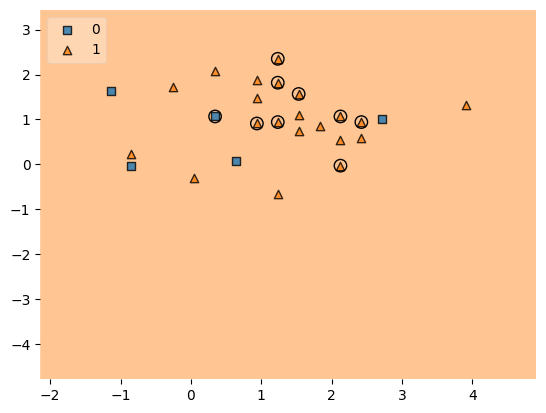

In [ ]:
from mlxtend.plotting import plot_decision_regions
value = 20000
width  =20000

plot_decision_regions(X.values, y.values, clf = knn, legend =2,filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width},
                      X_highlight=X_test.values)
plt.title("KNN with diabetes data")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
y_pred = knn.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)

Text(0.5, 23.52222222222222, 'Predicted label')

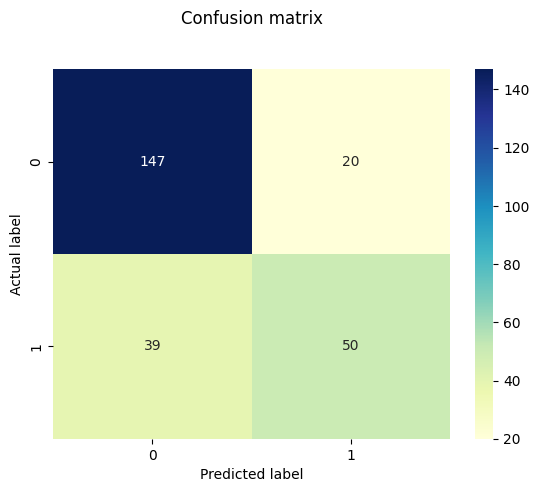

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
def model_evaluation(y_test, y_pred, model_name):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta = 2.0)

    results = pd.DataFrame([[model_name, acc, prec, rec, f1, f2]],
                       columns = ["Model", "Accuracy", "Precision", "Recall",
                                 "F1 SCore", "F2 Score"])
    results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
    return results



model_evaluation(y_test, y_pred, "KNN")

,Model,Accuracy,Precision,Recall,F1 SCore,F2 Score
0,KNN,0.769531,0.714286,0.561798,0.628931,0.586854


HEART DISEASE

Best k: 7
Accuracy: 0.9180327868852459
Confusion Matrix:
[[27  2]
 [ 3 29]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



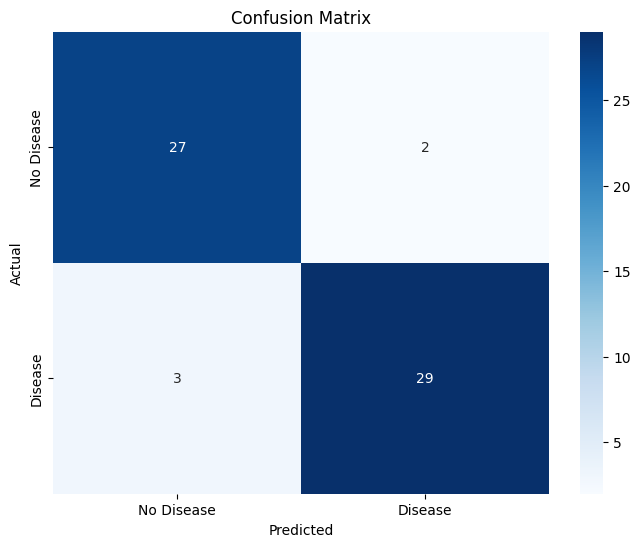

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('heart.csv')

# Define features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Find the best k value
best_k = 1
best_accuracy = 0
for k in range(1, 31):  # Test k values from 1 to 30
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f"Best k: {best_k}")

# Train the KNN classifier with the best k value
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot classification report (text-based, can't be plotted directly)
print("Classification Report:\n", class_report)

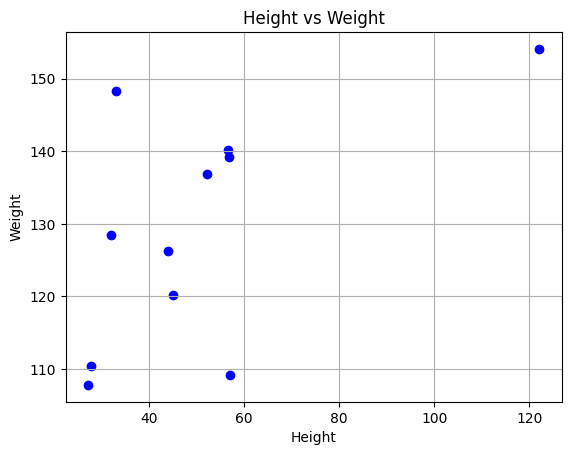

Support Vectors: [0 1 2 3 4 5 6 7]
R² score (accuracy) of the model: 0.1785
Root Mean Squared Error (RMSE): 11.6802


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Data
data = {
    "Height": [44, 52.1, 57.1, 33, 27.8, 27.2, 32, 45.1, 56.7, 56.9, 122.1],
    "Weight": [126.3, 136.9, 109.2, 148.3, 110.4, 107.8, 128.4, 120.2, 140.2, 139.2, 154.1]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('height_weight_data.csv', index=False)

# Load the data from CSV
df = pd.read_csv('height_weight_data.csv')

# Plotting the data
plt.scatter(df['Height'], df['Weight'], color='blue', label='Data points')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight')
plt.grid(True)
plt.show()

# Define features and target
X = df[['Height']]  # Feature: Height
y = df['Weight']  # Target: Weight

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the model
svr = SVR(kernel='linear')

# Fit the model
svr.fit(X_train, y_train)

# Predict on the test set
y_pred = svr.predict(X_test)

# Calculate R² score (accuracy for regression)
r2 = r2_score(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5  # Root Mean Squared Error

# Print the results
print(f"Support Vectors: {svr.support_}")
print(f"R² score (accuracy) of the model: {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
